In [16]:
def ordered_intersection(set1, set2):
    result = []
    for x in set2:
        if x in set1:
            result.append(x)
    return result

F3_2 = frozenset(['B', 'A'])
F7 = frozenset(['A', 'B', 'C'])

intersection_list = ordered_intersection(F7, F3_2)
intersection_list1 = [x for x in F3_2 if x in F7]
print(intersection_list1)  # 输出: [3, 2] # 输出: {3}

['B', 'A']


In [23]:
import numpy as np

def normalize_evidence(evidence_list):
    """
    归一化证据，使所有证据具有相同的事件键 {'A', 'B', 'C'}
    """
    all_hypotheses = {'A', 'B', 'C'}  # 确保所有证据具有相同的键
    normalized = []

    for ev in evidence_list:
        new_ev = {h: 0 for h in all_hypotheses}  # 初始化为 0
        for key, prob in ev.items():
            for h in key:  # 元组键可能包含多个事件
                new_ev[h] += prob / len(key)  # 平均分配概率
        normalized.append(new_ev)

    return normalized

def bhattacharyya_distance(p, q):
    """ 计算 Bhattacharyya 距离 """
    p, q = np.array(p), np.array(q)
    return -np.log(np.sum(np.sqrt(p * q)) + 1e-10)  # 避免 log(0)

def compute_similarity_matrix(evidence):
    """
    计算相似度矩阵 S
    """
    n = len(evidence)
    S = np.zeros((n, n))

    for i in range(n):
        for j in range(i, n):
            p = list(evidence[i].values())
            q = list(evidence[j].values())

            distance = bhattacharyya_distance(p, q)
            similarity = np.exp(-distance)  # 转化为相似度

            S[i, j] = similarity
            S[j, i] = similarity  # 矩阵对称

    return S

def compute_weight_from_similarity(S):
    """
    计算权重 R：
    - R = 归一化的 S_avg
    """
    S_avg = np.mean(S, axis=1)  # 每行的均值
    R = S_avg / np.sum(S_avg)  # 归一化
    return R

def soft_likelihood_estimation(fused):
    """
    软似然估计 (Soft Likelihood Estimation, SLE)
    - P(ω) = e^(P_raw / τ) / ∑ e^(P_raw / τ)
    """
    tau = 0.1
    fused_values = np.array(list(fused.values()))
    exp_values = np.exp(fused_values / tau)
    sle_values = exp_values / np.sum(exp_values)

    return {k: v for k, v in zip(fused.keys(), sle_values)}

def fuse_evidence(evidence, R):
    """
    计算融合概率：
    - 证据融合时，R 作为加权系数
    - 使用 SLE 进行最终的概率估计
    """
    fused = {}

    for omega in evidence[0]:  # 遍历所有假设
        belief_sum = sum(R[i] * evidence[i].get(omega, 0) for i in range(len(evidence)))
        fused[omega] = belief_sum

    # 归一化
    total_belief = sum(fused.values()) + 1e-10
    fused = {k: v / total_belief for k, v in fused.items()}

    # 软似然估计
    fused_sle = soft_likelihood_estimation(fused)

    return fused_sle

# 你的证据体
evidence = [
    {('A',): 0.7, ('B',): 0.15, ('C',): 0.15},
    {('B',): 0.5, ('C',): 0.5},
    {('A',): 0.7, ('B',): 0.15, ('C',): 0.15},
    {('A',): 0.7, ('B',): 0.15, ('C',): 0.15},
    {('A', 'C'): 0.8, ('B',): 0.2}
]

# 处理证据体格式
normalized_evidence = normalize_evidence(evidence)

# 计算相似度矩阵
S = compute_similarity_matrix(normalized_evidence)

# 计算权重 R
R = compute_weight_from_similarity(S)

# 计算融合概率
fused_probabilities = fuse_evidence(normalized_evidence, R)

print("Optimal R:", R)
print("Fused probabilities (after SLE):", fused_probabilities)


Optimal R: [0.20909977 0.15846872 0.20909977 0.20909977 0.21423198]
Fused probabilities (after SLE): {'A': 0.8962386420022932, 'B': 0.040933148379719606, 'C': 0.06282820961798728}


Optimal R: [0.21626085 0.12421038 0.21626085 0.21626085 0.22700708]
Fused probabilities (optimized SLF-CR): {'A': 0.5467086494865692, 'B': 0.20534838166129718, 'C': 0.24794296835062596}


Optimal R: [0.27529654 0.00049556 0.27529655 0.27529654 0.17361482]
Fused probabilities (after SLF): {'C': 0.01018546887736046, 'A': 0.9827780513412276, 'B': 0.007036479216810877}


NameError: name 'new_compute_weight_from_similarity' is not defined

Interference x = 0.00: Fused probabilities = {'C': 0.0027149432460734503, 'A': 0.9945463649071297, 'B': 0.0027386917230861224}
Interference x = 0.10: Fused probabilities = {'C': 0.002804987620915858, 'A': 0.9944141748740639, 'B': 0.0027808373793780814}
Interference x = 0.20: Fused probabilities = {'C': 0.002898939028376777, 'A': 0.994275608001054, 'B': 0.0028254528429434564}
Interference x = 0.30: Fused probabilities = {'C': 0.0029957431537190487, 'A': 0.9941326798426243, 'B': 0.002871576873994683}
Interference x = 0.40: Fused probabilities = {'C': 0.003095307479885276, 'A': 0.9939855396992303, 'B': 0.002919152689135011}
Interference x = 0.50: Fused probabilities = {'C': 0.0031975556620417603, 'A': 0.9938342828516317, 'B': 0.002968161352440849}
Interference x = 0.60: Fused probabilities = {'C': 0.003302359808830887, 'A': 0.993679055728131, 'B': 0.003018584326971912}
Interference x = 0.70: Fused probabilities = {'C': 0.003409461017377547, 'A': 0.9935201584647181, 'B': 0.0030703803796231

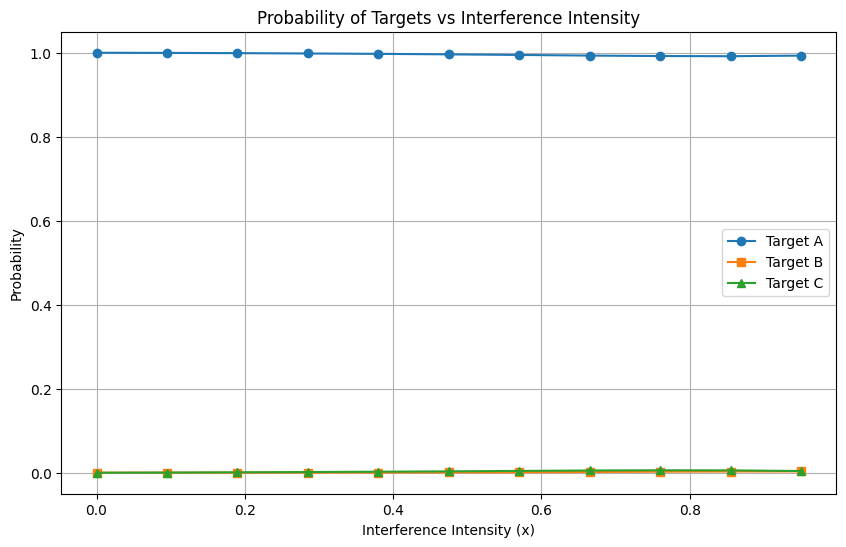

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# 示例数据
x_values = np.linspace(0, 0.95, 11)
prob_A = [0.9996, 0.9992, 0.9986, 0.9978, 0.9969, 0.9957, 0.9943, 0.9928, 0.9917, 0.9913, 0.9927]
prob_B = [0.0003, 0.0003, 0.0003, 0.0004, 0.0006, 0.0008, 0.0012, 0.0018, 0.0025, 0.0030, 0.0032]
prob_C = [0.0001, 0.0005, 0.0011, 0.0018, 0.0025, 0.0034, 0.0044, 0.0054, 0.0059, 0.0057, 0.0041]

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(x_values, prob_A, label='Target A', marker='o')
plt.plot(x_values, prob_B, label='Target B', marker='s')
plt.plot(x_values, prob_C, label='Target C', marker='^')

# 添加标题和标签
plt.title('Probability of Targets vs Interference Intensity')
plt.xlabel('Interference Intensity (x)')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)

# 显示图表
plt.show()

Target H1 (A): Mean = 0.995423, Variance = 0.000009
Target H2 (B): Mean = 0.001280, Variance = 0.000001
Target H3 (C): Mean = 0.003297, Variance = 0.000004


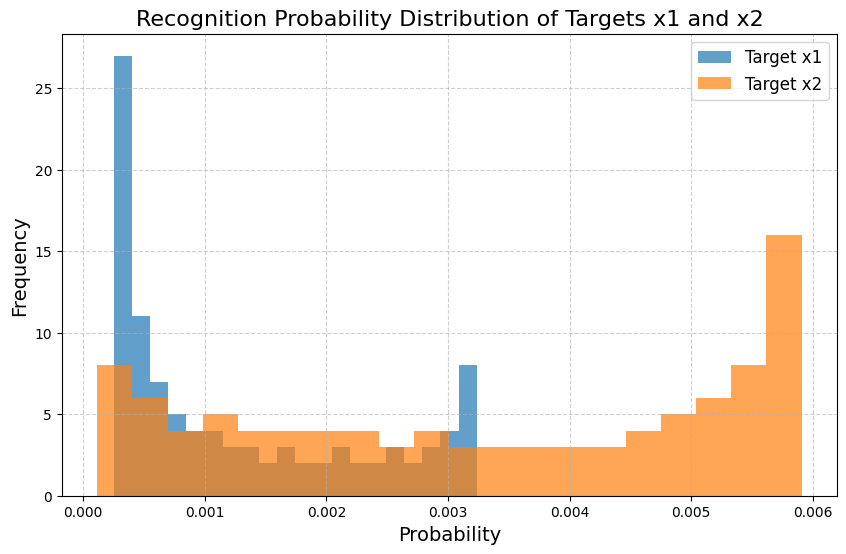

Interference x = 0.00: Fused probabilities = {'B': 0.0027386917230861224, 'A': 0.9945463649071297, 'C': 0.0027149432460734503}
Interference x = 0.01: Fused probabilities = {'B': 0.002742261042994346, 'A': 0.9945347173656169, 'C': 0.002723021467494139}
Interference x = 0.02: Fused probabilities = {'B': 0.002746188627383045, 'A': 0.9945223187417718, 'C': 0.002731492506767212}
Interference x = 0.03: Fused probabilities = {'B': 0.0027501686723119577, 'A': 0.9945097981894047, 'C': 0.0027400330140212857}
Interference x = 0.04: Fused probabilities = {'B': 0.002754090072679018, 'A': 0.9944973805013534, 'C': 0.0027485293015206487}
Interference x = 0.05: Fused probabilities = {'B': 0.0027519293588786605, 'A': 0.9944971240462692, 'C': 0.002750946470190732}
Interference x = 0.06: Fused probabilities = {'B': 0.002761963105213941, 'A': 0.9944724334579039, 'C': 0.0027656033120630657}
Interference x = 0.07: Fused probabilities = {'B': 0.0027664799815540903, 'A': 0.994458784402199, 'C': 0.0027747354912

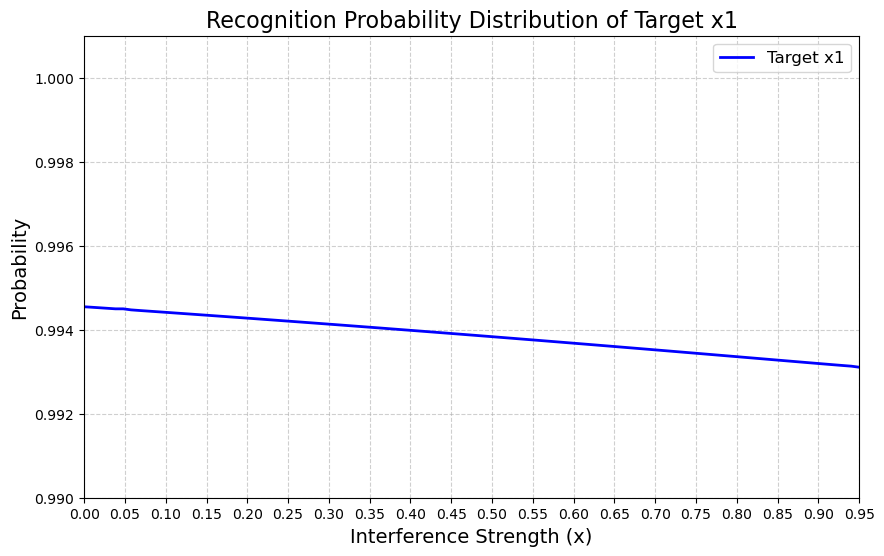

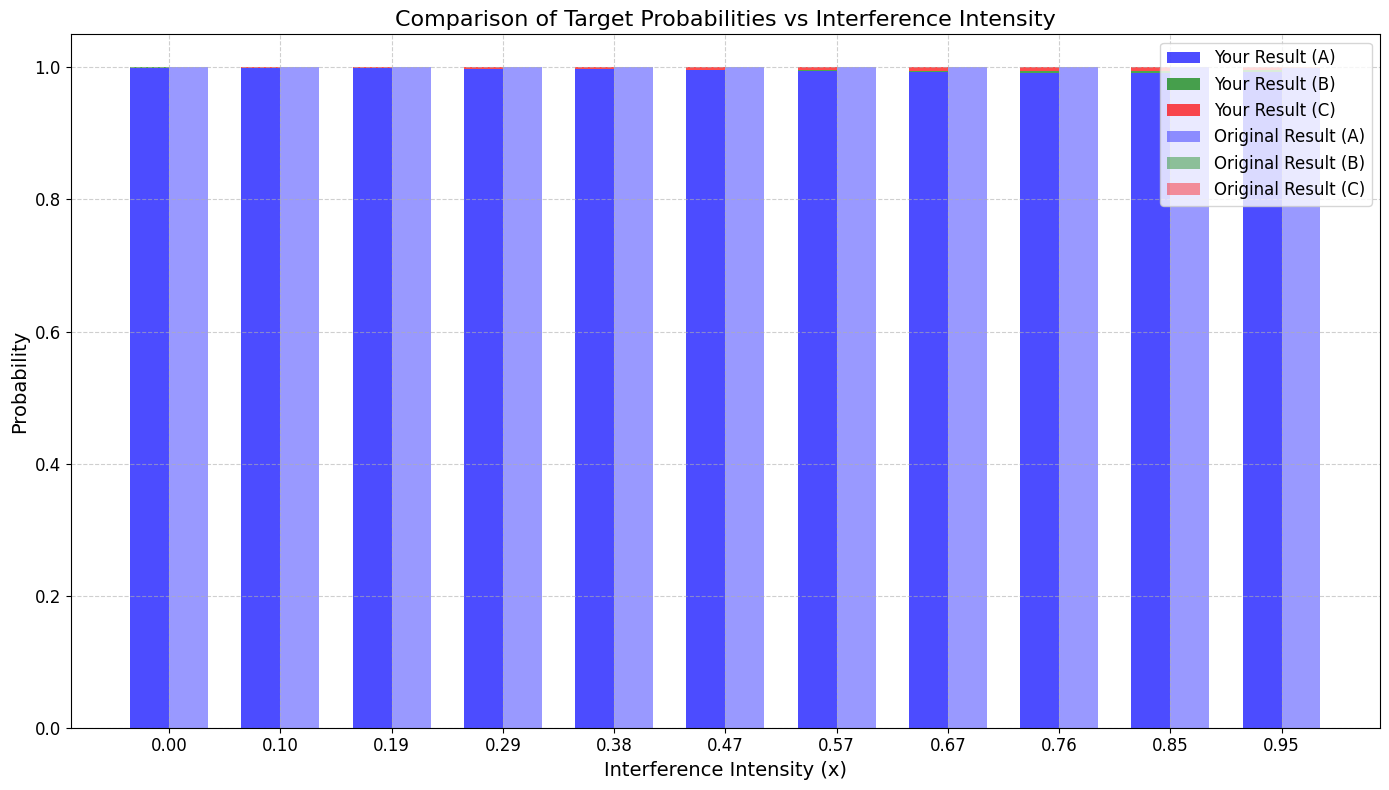

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# 示例数据
x_values = np.linspace(0, 0.95, 11)

# 你的实验结果
prob_A_yours = [0.9996, 0.9992, 0.9986, 0.9978, 0.9969, 0.9957, 0.9943, 0.9928, 0.9917, 0.9913, 0.9927]
prob_B_yours = [0.0003, 0.0003, 0.0003, 0.0004, 0.0006, 0.0008, 0.0012, 0.0018, 0.0025, 0.0030, 0.0032]
prob_C_yours = [0.0001, 0.0005, 0.0011, 0.0018, 0.0025, 0.0034, 0.0044, 0.0054, 0.0059, 0.0057, 0.0041]

# 图片中的结果
prob_A_original = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.9989]
prob_B_original = [1.2184e-11, 1.2184e-11, 1.9778e-11, 3.4325e-11, 6.5072e-11, 1.3938e-10, 3.5744e-10, 1.2278e-09, 7.3826e-09, 2.0792e-07, 1.4136e-05]
prob_C_original = [0, 0, 2.4418e-12, 2.1454e-11, 1.2854e-10, 6.7220e-10, 3.5745e-09, 2.2748e-08, 2.3333e-07, 1.0526e-05, 0.0011]

# 设置柱状图的宽度和位置
bar_width = 0.35
index = np.arange(len(x_values))

# 绘制对比柱状图
plt.figure(figsize=(14, 8))

# 你的结果
plt.bar(index - bar_width/2, prob_A_yours, width=bar_width, label='Your Result (A)', color='blue', alpha=0.7)
plt.bar(index - bar_width/2, prob_B_yours, width=bar_width, label='Your Result (B)', color='green', alpha=0.7, bottom=prob_A_yours)
plt.bar(index - bar_width/2, prob_C_yours, width=bar_width, label='Your Result (C)', color='red', alpha=0.7, bottom=np.array(prob_A_yours) + np.array(prob_B_yours))

# 图片中的结果
plt.bar(index + bar_width/2, prob_A_original, width=bar_width, label='Original Result (A)', color='blue', alpha=0.4)
plt.bar(index + bar_width/2, prob_B_original, width=bar_width, label='Original Result (B)', color='green', alpha=0.4, bottom=prob_A_original)
plt.bar(index + bar_width/2, prob_C_original, width=bar_width, label='Original Result (C)', color='red', alpha=0.4, bottom=np.array(prob_A_original) + np.array(prob_B_original))

# 添加标题和标签
plt.title('Comparison of Target Probabilities vs Interference Intensity', fontsize=16)
plt.xlabel('Interference Intensity (x)', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.xticks(index, [f'{x:.2f}' for x in x_values], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)

# 显示图表
plt.tight_layout()
plt.show()

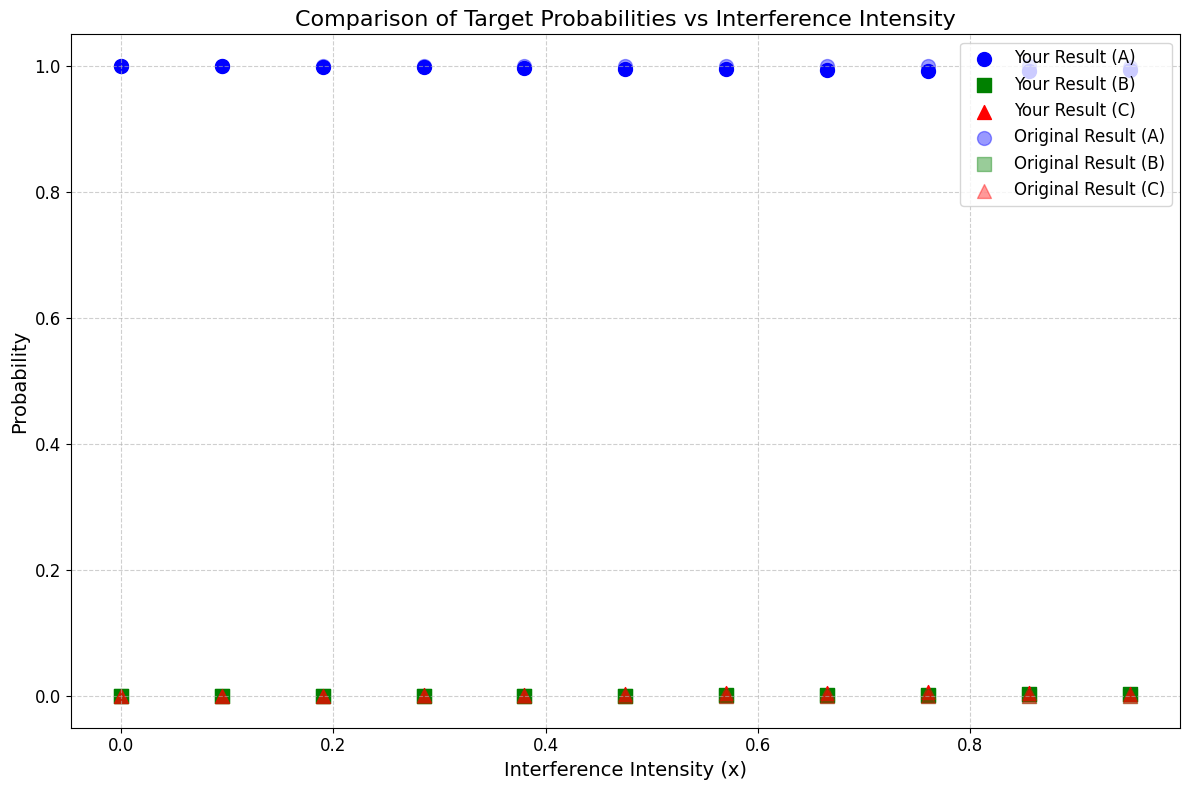

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# 示例数据
x_values = np.linspace(0, 0.95, 11)

# 你的实验结果
prob_A_yours = [0.9996, 0.9992, 0.9986, 0.9978, 0.9969, 0.9957, 0.9943, 0.9928, 0.9917, 0.9913, 0.9927]
prob_B_yours = [0.0003, 0.0003, 0.0003, 0.0004, 0.0006, 0.0008, 0.0012, 0.0018, 0.0025, 0.0030, 0.0032]
prob_C_yours = [0.0001, 0.0005, 0.0011, 0.0018, 0.0025, 0.0034, 0.0044, 0.0054, 0.0059, 0.0057, 0.0041]

# 图片中的结果
prob_A_original = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.9989]
prob_B_original = [1.2184e-11, 1.2184e-11, 1.9778e-11, 3.4325e-11, 6.5072e-11, 1.3938e-10, 3.5744e-10, 1.2278e-09, 7.3826e-09, 2.0792e-07, 1.4136e-05]
prob_C_original = [0, 0, 2.4418e-12, 2.1454e-11, 1.2854e-10, 6.7220e-10, 3.5745e-09, 2.2748e-08, 2.3333e-07, 1.0526e-05, 0.0011]

# 绘制对比散点图
plt.figure(figsize=(12, 8))

# 你的结果
plt.scatter(x_values, prob_A_yours, label='Your Result (A)', marker='o', color='blue', s=100)
plt.scatter(x_values, prob_B_yours, label='Your Result (B)', marker='s', color='green', s=100)
plt.scatter(x_values, prob_C_yours, label='Your Result (C)', marker='^', color='red', s=100)

# 图片中的结果
plt.scatter(x_values, prob_A_original, label='Original Result (A)', marker='o', color='blue', s=100, alpha=0.4)
plt.scatter(x_values, prob_B_original, label='Original Result (B)', marker='s', color='green', s=100, alpha=0.4)
plt.scatter(x_values, prob_C_original, label='Original Result (C)', marker='^', color='red', s=100, alpha=0.4)

# 添加标题和标签
plt.title('Comparison of Target Probabilities vs Interference Intensity', fontsize=16)
plt.xlabel('Interference Intensity (x)', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)

# 显示图表
plt.tight_layout()
plt.show()

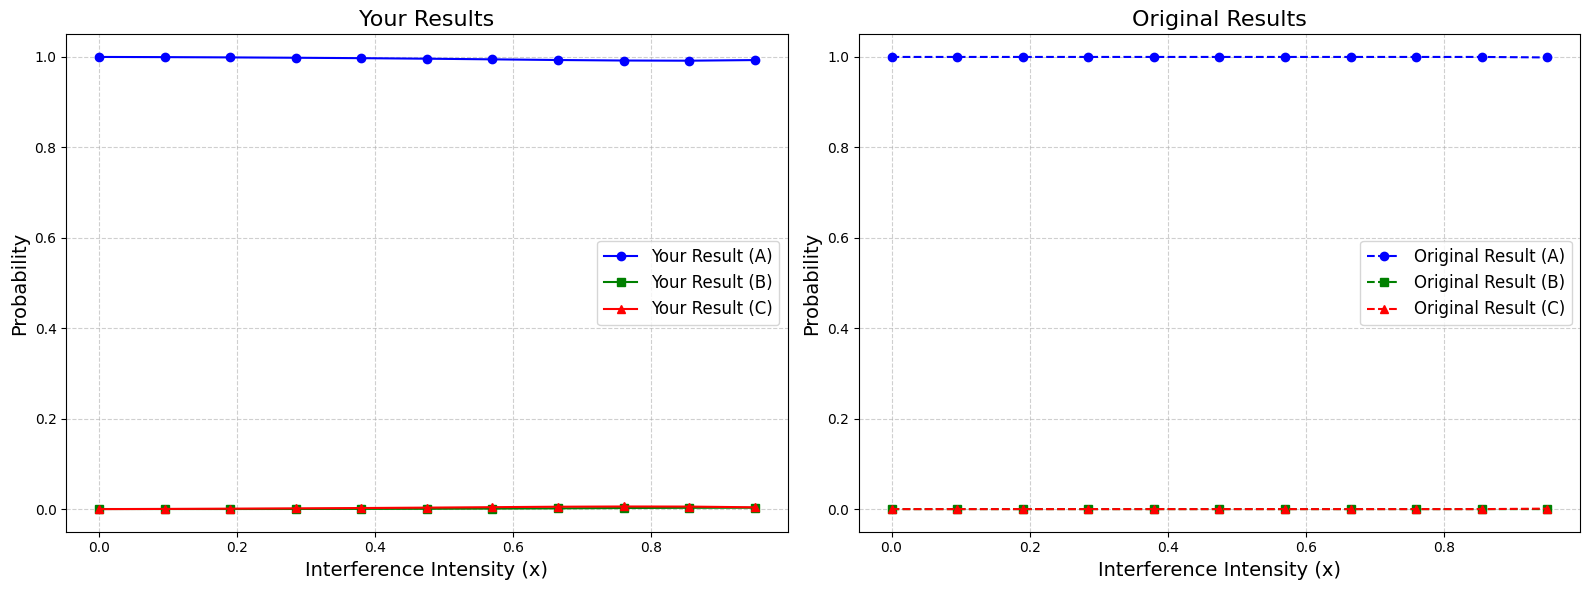

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# 示例数据
x_values = np.linspace(0, 0.95, 11)

# 你的实验结果
prob_A_yours = [0.9996, 0.9992, 0.9986, 0.9978, 0.9969, 0.9957, 0.9943, 0.9928, 0.9917, 0.9913, 0.9927]
prob_B_yours = [0.0003, 0.0003, 0.0003, 0.0004, 0.0006, 0.0008, 0.0012, 0.0018, 0.0025, 0.0030, 0.0032]
prob_C_yours = [0.0001, 0.0005, 0.0011, 0.0018, 0.0025, 0.0034, 0.0044, 0.0054, 0.0059, 0.0057, 0.0041]

# 图片中的结果
prob_A_original = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.9989]
prob_B_original = [1.2184e-11, 1.2184e-11, 1.9778e-11, 3.4325e-11, 6.5072e-11, 1.3938e-10, 3.5744e-10, 1.2278e-09, 7.3826e-09, 2.0792e-07, 1.4136e-05]
prob_C_original = [0, 0, 2.4418e-12, 2.1454e-11, 1.2854e-10, 6.7220e-10, 3.5745e-09, 2.2748e-08, 2.3333e-07, 1.0526e-05, 0.0011]

# 创建画布和子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 第一个子图：你的实验结果
ax1.plot(x_values, prob_A_yours, label='Your Result (A)', marker='o', linestyle='-', color='blue')
ax1.plot(x_values, prob_B_yours, label='Your Result (B)', marker='s', linestyle='-', color='green')
ax1.plot(x_values, prob_C_yours, label='Your Result (C)', marker='^', linestyle='-', color='red')

# 添加标题和标签
ax1.set_title('Your Results', fontsize=16)
ax1.set_xlabel('Interference Intensity (x)', fontsize=14)
ax1.set_ylabel('Probability', fontsize=14)
ax1.legend(fontsize=12, loc='center right')
ax1.grid(True, linestyle='--', alpha=0.6)

# 第二个子图：图片中的结果
ax2.plot(x_values, prob_A_original, label='Original Result (A)', marker='o', linestyle='--', color='blue')
ax2.plot(x_values, prob_B_original, label='Original Result (B)', marker='s', linestyle='--', color='green')
ax2.plot(x_values, prob_C_original, label='Original Result (C)', marker='^', linestyle='--', color='red')

# 添加标题和标签
ax2.set_title('Original Results', fontsize=16)
ax2.set_xlabel('Interference Intensity (x)', fontsize=14)
ax2.set_ylabel('Probability', fontsize=14)
ax2.legend(fontsize=12, loc='center right')
ax2.grid(True, linestyle='--', alpha=0.6)

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

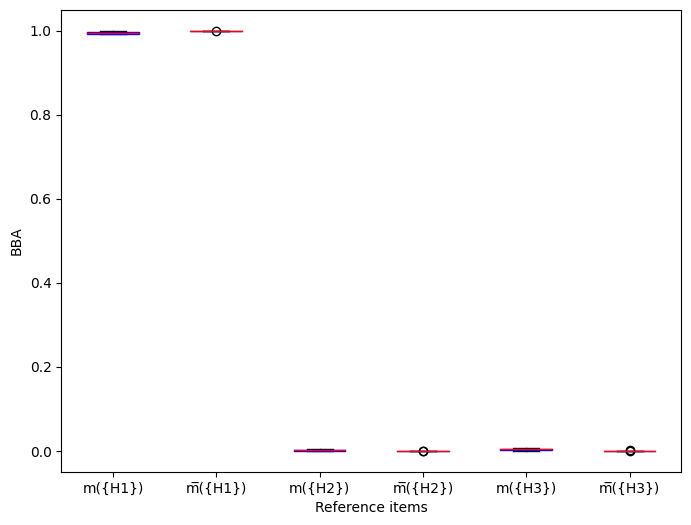

In [21]:
import matplotlib.pyplot as plt

# 数据
data = [
    [0.9996129559077601, 0.9991806183393108, 0.9984919795974132, 0.997666200208999, 0.9966456493202993,
     0.9953675272410486, 0.993855315401038, 0.9923401967038273, 0.9913812341923016, 0.9916038452691657, 0.9926830104309512],  # prob_A_yours
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.9989],  # prob_A_original
    [0.0002717869312640659, 0.00027813585723219895, 0.0003450597273558409, 0.00045613385061718845,
     0.0006397158180408863, 0.0009349435450032764, 0.00140769476861288, 0.0020444627767913985, 0.0027145905123951283,
     0.0031687553545863044, 0.00322875893387455],  # prob_B_yours
    [1.2184e-11, 1.2184e-11, 1.9778e-11, 3.4325e-11, 6.5072e-11, 1.3938e-10, 3.5744e-10, 1.2278e-09,
     7.3826e-09, 2.0792e-07, 1.4136e-05],  # prob_B_original
    [0.00011525703130665535, 0.0005412456590317183, 0.0011629605127899299, 0.0018776657558153612,
     0.0027146346504062975, 0.003697528972223183, 0.004736989560347962, 0.005615340234671209, 0.005904175025346988,
     0.005227399158345923, 0.004088230471115444],  # prob_C_yours
    [0, 0, 2.4418e-12, 2.1454e-11, 1.2854e-10, 6.7220e-10, 3.5745e-09, 2.2748e-08, 2.3333e-07, 1.0526e-05, 0.0011]  # prob_C_original
]

# 箱型图
plt.figure(figsize=(8, 6))
plt.boxplot(data, patch_artist=True, boxprops=dict(color="blue"), medianprops=dict(color="red"))

# 设置 x 轴标签
plt.xticks([1, 2, 3, 4, 5, 6],
           ['m({H1})', 'm̅({H1})', 'm({H2})', 'm̅({H2})', 'm({H3})', 'm̅({H3})'])

# 轴标签
plt.xlabel("Reference items")
plt.ylabel("BBA")

# 显示图像
plt.show()


Target H2 (B): Mean = 0.005211, Variance = 0.000139
Target H3 (C): Mean = 0.049169, Variance = 0.027682


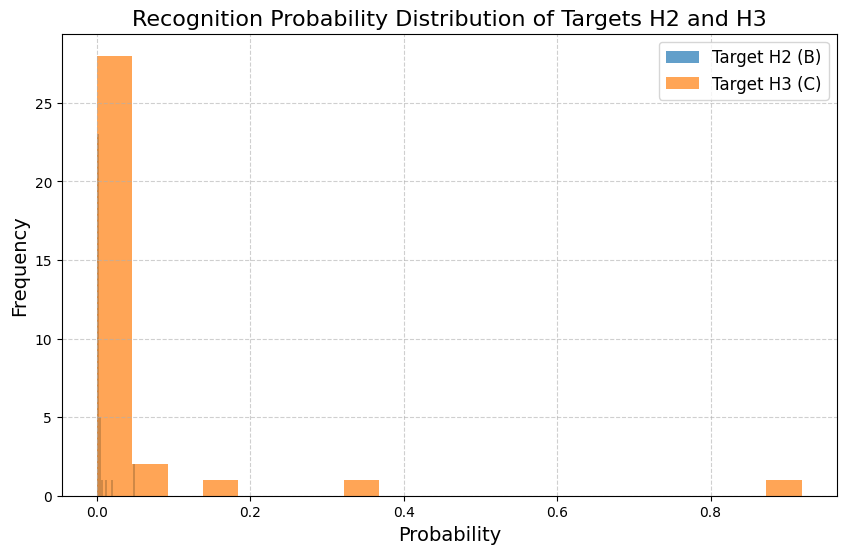

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# 提取目标 H2 和 H3 的识别概率
prob_B = [
    0.0002717869312640659, 0.00027282802721972243, 0.00033656212314731976, 0.0004390239892948714,
    0.0005954686897689265, 0.0008483104190342866, 0.00124905586678685, 0.001801475022242174,
    0.0024602263935918516, 0.0030065660290546784, 0.00322875893387455, 0.0030223173372792645,
    0.049999999992295076, 0.00033656212314731976, 0.0004390239892948714, 0.0005954686897689265,
    0.005690312001455548, 0.00124905586678685, 0.001801475022242174, 0.012091650607104352,
    0.01934616550263726, 0.04836065568294643, 0.0002717869312640659, 0.00027282802721972243,
    0.00033656212314731976, 0.0004390239892948714, 0.0005954686897689265, 0.0008483104190342866,
    0.00124905586678685, 0.001801475022242174, 0.0024602263935918516, 0.0030065660290546784,
    0.00322875893387455
]

prob_C = [
    0.00011525703130665535, 0.0005152026444234904, 0.0010972563755148267, 0.0017582486340509693,
    0.0025358893214287134, 0.003438276767549181, 0.004422670204302191, 0.005367573333822498,
    0.005874547942597385, 0.005673360800943793, 0.004088230471115444, 0.00011383492795392215,
    0.049999999992295076, 0.0010972563755148267, 0.0017582486340509693, 0.0025358893214287134,
    0.0540579640138277, 0.004422670204302191, 0.005367573333822498, 0.18379308922798618,
    0.3308194189006082, 0.9188524564155641, 0.00011525703130665535, 0.0005152026444234904,
    0.0010972563755148267, 0.0017582486340509693, 0.0025358893214287134, 0.003438276767549181,
    0.004422670204302191, 0.005367573333822498, 0.005874547942597385, 0.005673360800943793,
    0.004088230471115444
]

# 计算均值和方差
mean_B = np.mean(prob_B)
variance_B = np.var(prob_B)

mean_C = np.mean(prob_C)
variance_C = np.var(prob_C)

print(f"Target H2 (B): Mean = {mean_B:.6f}, Variance = {variance_B:.6f}")
print(f"Target H3 (C): Mean = {mean_C:.6f}, Variance = {variance_C:.6f}")

# 绘制目标 H2 和 H3 的识别概率分布
plt.figure(figsize=(10, 6))
plt.hist(prob_B, bins=20, alpha=0.7, label='Target H2 (B)')
plt.hist(prob_C, bins=20, alpha=0.7, label='Target H3 (C)')
plt.title('Recognition Probability Distribution of Targets H2 and H3', fontsize=16)
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
import numpy as np
from itertools import combinations

def jaccard_similarity(A, B):
    """
    计算两个焦元之间的 Jaccard 相似度
    """
    if A == B == frozenset():  # 空集的特殊情况
        return 1.0
    intersection = len(A.intersection(B))
    union = len(A.union(B))
    return intersection / union if union > 0 else 0.0

def build_jaccard_matrix(focal_elements):
    """
    构建 Jaccard 矩阵 D
    """
    n = len(focal_elements)
    D = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            D[i, j] = jaccard_similarity(focal_elements[i], focal_elements[j])
    return D

def jousselme_distance(m1, m2):
    """
    计算两个 BPA 之间的 Jousselme 距离
    """
    # 获取所有焦元
    focal_elements = list(set(m1.keys()).union(set(m2.keys())))
    focal_elements = [frozenset(f) for f in focal_elements]

    # 构建 Jaccard 矩阵
    D = build_jaccard_matrix(focal_elements)

    # 构建 BPA 向量
    m1_vec = np.array([m1.get(f, 0) for f in focal_elements])
    m2_vec = np.array([m2.get(f, 0) for f in focal_elements])

    # 计算距离
    diff = m1_vec - m2_vec
    distance = np.sqrt(0.5 * np.dot(diff.T, np.dot(D, diff)))
    return distance

# 示例
m1 = {frozenset({'A'}): 0.5, frozenset({'B'}): 0.2, frozenset({'C'}): 0.3}
m2 = {frozenset({'B'}): 0.9, frozenset({'C'}): 0.1}
distance = jousselme_distance(m1, m2)
print("Jousselme Distance:", distance)